## **HAND GESTURE RECOGNITION USING CNN**

**Problem statement:**

  Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data enabling intuitive human computer interaction and gesture based control system

The goal of this project is to train a Machine Learning algorithm capable of classifying images of different hand gestures, such as a fist, palm, showing the thumb, and others. With this, I'll be able to understand more about this field and create my own program that fits the data that I have.

**IMPORT DATASET**

For this , I use Kaggle leapGestRecog dataset

In [ ]:
import os

os.makedirs("/content/leapGestRecog.zip", exist_ok=True)

In [ ]:
import os
import shutil

# Create the target folder
leap_dir = "/content/leapGestRecog"
os.makedirs(leap_dir, exist_ok=True)

# Move all .zip files into the leapGestRecog folder
for f in os.listdir("/content"):
    if f.endswith(".zip"):
        shutil.move(os.path.join("/content", f), os.path.join(leap_dir, f))

print("✅ Moved all zip files to /content/leapGestRecog")


✅ Moved all zip files to /content/leapGestRecog


In [ ]:
import shutil

folder_path = "/content/leapGestRecog"  # 👈 Folder you want to zip
output_zip = "/content/leapGestRecog_combined.zip"

shutil.make_archive(output_zip.replace(".zip", ""), 'zip', folder_path)
print("✅ Combined ZIP created:", output_zip)


✅ Combined ZIP created: /content/leapGestRecog_combined.zip


In [ ]:
import zipfile
import os

zip_path = "/content/leapGestRecog_combined.zip"
extract_to = "/content/leapGestRecog_extracted"

# Create the target directory
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Extracted to:", extract_to)


✅ Extracted to: /content/leapGestRecog_extracted


In [ ]:
import os
import zipfile

main_folder = "/content/leapGestRecog_extracted"

# Loop through all items in the folder
for filename in os.listdir(main_folder):
    zip_path = os.path.join(main_folder, filename)

    # Proceed only if it’s a file and ends with .zip
    if os.path.isfile(zip_path) and filename.endswith(".zip"):
        extract_to = os.path.join(main_folder, filename.replace(".zip", ""))
        os.makedirs(extract_to, exist_ok=True)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)

        print(f"✅ Extracted: {filename}")


✅ Extracted: 03_fist (6).zip
✅ Extracted: 05_thumb (2).zip
✅ Extracted: 07_ok (2).zip
✅ Extracted: 02_l (9).zip
✅ Extracted: 02_l (3).zip
✅ Extracted: 02_l (2).zip
✅ Extracted: 04_fist_moved (4).zip
✅ Extracted: 06_index (6).zip
✅ Extracted: 05_thumb (6).zip
✅ Extracted: 08_palm_moved (2).zip
✅ Extracted: 02_l (1).zip
✅ Extracted: 08_palm_moved.zip
✅ Extracted: 01_palm (6).zip
✅ Extracted: 03_fist (5).zip
✅ Extracted: 07_ok (4).zip
✅ Extracted: 05_thumb (7).zip
✅ Extracted: 03_fist (9).zip
✅ Extracted: 08_palm_moved (4).zip
✅ Extracted: 10_down (1).zip
✅ Extracted: 10_down (8).zip
✅ Extracted: 07_ok (8).zip
✅ Extracted: 08_palm_moved (7).zip
✅ Extracted: 10_down (5).zip
✅ Extracted: 06_index (5).zip
✅ Extracted: 03_fist (3).zip
✅ Extracted: 09_c (2).zip
✅ Extracted: 06_index (7).zip
✅ Extracted: 04_fist_moved (7).zip
✅ Extracted: 06_index (8).zip
✅ Extracted: 06_index (1).zip
✅ Extracted: 10_down.zip
✅ Extracted: 04_fist_moved (6).zip
✅ Extracted: 01_palm (5).zip
✅ Extracted: 05_thumb 

**IMPORT LIBRARIES NEED FOR PROJECT**

In [17]:
%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

2.18.0


In [45]:
!pip install pyautogui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautogui: filename=pyautogui-0.9.54-py3-none-any.whl size=37684 sha256=f264379b051080e830107af4c938863b9bdffe4f166c1ca9cc1b7300

In [18]:
# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(".", topdown=False):
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded

20000


In [19]:
# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640)


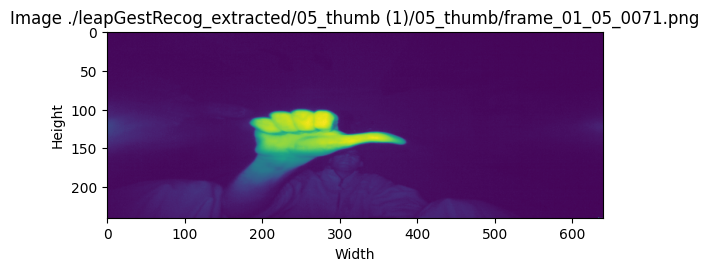

In [20]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array

In [21]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)

  # Processing label in image path
  category = path.split("/")[3]
  label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes
  y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  20000
Labels loaded:  20000
5 ./leapGestRecog_extracted/05_thumb (1)/05_thumb/frame_01_05_0071.png


In [22]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [26]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
219/219 - 1107s - 5s/step - accuracy: 0.9260 - loss: 0.6816 - val_accuracy: 0.9962 - val_loss: 0.0106
Epoch 2/5
219/219 - 1103s - 5s/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 3/5
219/219 - 1121s - 5s/step - accuracy: 1.0000 - loss: 7.6493e-05 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 4/5
219/219 - 1094s - 5s/step - accuracy: 1.0000 - loss: 1.2197e-05 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 5/5
219/219 - 1096s - 5s/step - accuracy: 1.0000 - loss: 7.3572e-06 - val_accuracy: 0.9998 - val_loss: 0.0013


In [27]:
# Save entire model to a HDF5 file
model.save('handrecognition_model.h5')

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 111s 591ms/step - accuracy: 1.0000 - loss: 1.8653e-04
Test accuracy: 99.98%


In [29]:
predictions = model.predict(X_test) # Make predictions towards the test set

188/188 ━━━━━━━━━━━━━━━━━━━━ 112s 594ms/step


In [33]:
np.argmax(predictions[0]), y_test[0]

(3, 3)

In [34]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]
  plt.figure(figsize=(15,5))

  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction

    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

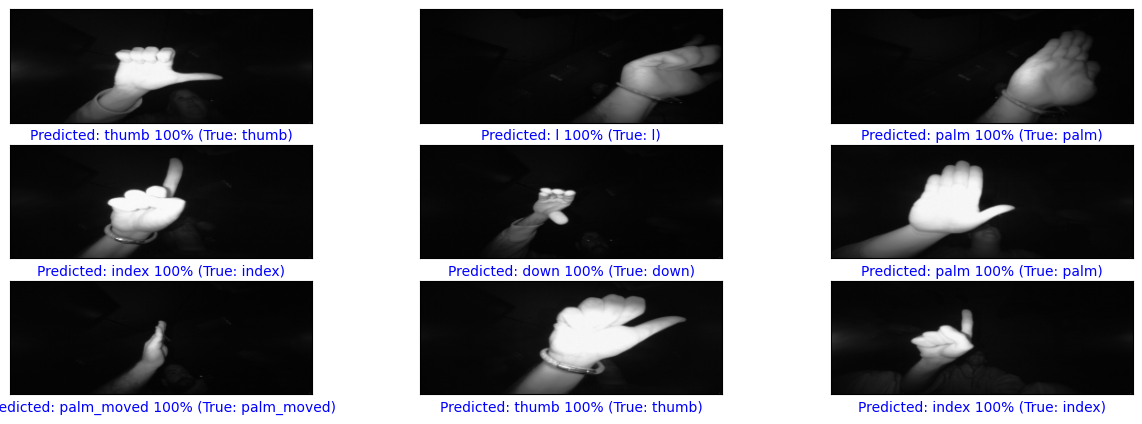

In [35]:
validate_9_images(predictions, y_test, X_test)

In [36]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number

In [37]:
# H = Horizontal
# V = Vertical

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])

,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,597,0,0,0,0,0,0,0,0,0
Actual Palm (H),0,623,0,0,0,0,0,0,0,0
Actual L,0,0,594,0,0,0,0,0,0,0
Actual Fist (H),0,0,0,599,0,0,0,0,0,0
Actual Fist (V),0,0,0,0,587,0,0,0,0,0
Actual Thumbs up,0,0,0,0,0,601,0,0,0,0
Actual Index,0,0,0,1,0,0,631,0,0,0
Actual OK,0,0,0,0,0,0,0,598,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,573,0
Actual C,0,0,0,0,0,0,0,0,0,596
